Three observable trends based on the data:
1. While "Urban" rides contribute to 62.7% of total fares but "Rural" rides has the highest average fare. This could be due to competition and distance traveled. Additional data set such as distance travelled could be usefull to confirm this hypothesis.
2. "Urban" rides has the highest quantity while "Rural" rides has the lowest quantity due to population and demand.
3. Highest demand on rides services in "Urban" city also demanding higher drivers count.

In [45]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [46]:
merge_data.groupby("type").count()

,city,date,fare,ride_id,driver_count
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


## Bubble Plot of Ride Sharing Data

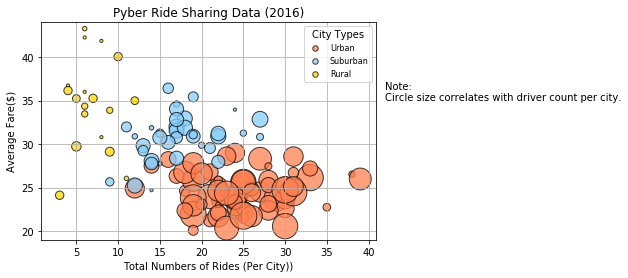

In [47]:
# Obtain the x and y coordinates for each of the three city types
urban = merge_data.loc[(merge_data["type"] == "Urban")]
urban_fare_avg = urban.groupby("city")["fare"].mean()
urban_ride = urban.groupby("city")["ride_id"].count()
urban_driver = urban.groupby("city")["driver_count"].mean()*10

Suburban = merge_data.loc[(merge_data["type"] == "Suburban")]
Suburban_fare_avg = Suburban.groupby("city")["fare"].mean()
Suburban_ride = Suburban.groupby("city")["ride_id"].count()
Suburban_driver = Suburban.groupby("city")["driver_count"].mean()*10

Rural = merge_data.loc[(merge_data["type"] == "Rural")]
Rural_fare_avg = Rural.groupby("city")["fare"].mean()
Rural_ride = Rural.groupby("city")["ride_id"].count()
Rural_driver = Rural.groupby("city")["driver_count"].mean()*10

# Build the scatter plots for each city types
plt.scatter(urban_ride, urban_fare_avg, marker="o", facecolors="coral", edgecolors="black",
            s=urban_driver, alpha=0.75, label="Urban")

plt.scatter(Suburban_ride, Suburban_fare_avg, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=Suburban_driver, alpha=0.75, label="Suburban")

plt.scatter(Rural_ride, Rural_fare_avg, marker="o", facecolors="gold", edgecolors="black",
            s=Rural_driver, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.ylim(19,44)


# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
# plt.legend(title="City Types", loc='best')
# Plot legend.
lgnd = plt.legend(title="City Types", loc='best', numpoints=1, fontsize=8)

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
#plt.legend()      #not here, now
plt.grid()
# Incorporate a text label regarding circle size
plt.text(42,35,"Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("data/1_Bubble_Plot.png")
plt.show()

## Total Fares by City Type

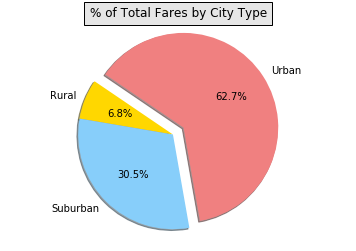

In [48]:
# Calculate Type Percents
total_fare = ride_df["fare"].sum()
utf = urban["fare"].sum()/total_fare
stf = Suburban["fare"].sum()/total_fare
rtf = Rural["fare"].sum()/total_fare

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [utf, rtf, stf]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Rural & Suburban" section from the others
explode = (0.2, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280, radius = 1.5)

#draw circle
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
# plt.tight_layout()

plt.title("% of Total Fares by City Type", bbox={'facecolor':'0.9', 'pad':5})
plt.axis('equal')

# Save Figure
plt.savefig("data/2_Pie_Plot_Fare.png")

## Total Rides by City Type

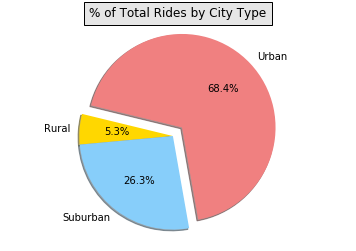

In [49]:
# Calculate Ride Percents
total_rides = ride_df["ride_id"].count()
utr = urban["ride_id"].count()/total_rides
str = Suburban["ride_id"].count()/total_rides
rtr = Rural["ride_id"].count()/total_rides

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [utr, rtr, str]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Rural & Suburban" section from the others
explode = (0.2, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280, radius = 1.5)

plt.title("% of Total Rides by City Type", bbox={'facecolor':'0.9', 'pad':5})
plt.axis('equal')

# Save Figure
plt.savefig("data/3_Pie_Plot_Riders.png")
plt.show()

## Total Drivers by City Type

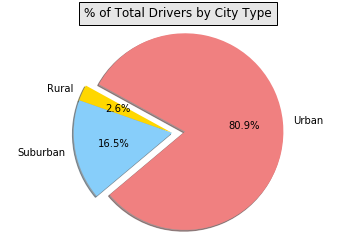

In [50]:
# Calculate Driver Percents
total_drivers = city_df["driver_count"].sum()
urban_c = city_df.loc[(city_df["type"] == "Urban")]
suburban_c = city_df.loc[(city_df["type"] == "Suburban")]
rural_c = city_df.loc[(city_df["type"] == "Rural")]
utd = urban_c["driver_count"].sum()/total_drivers
std = suburban_c["driver_count"].sum()/total_drivers
rtd = rural_c["driver_count"].sum()/total_drivers

# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [utd, rtd, std]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Rural & Suburban" section from the others
explode = (0.2, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=220, radius = 1.5)

plt.title("% of Total Drivers by City Type", bbox={'facecolor':'0.9', 'pad':5})
plt.axis('equal')

# Save Figure
plt.savefig("data/4_Pie_Plot_Drivers.png")
plt.show()